# Практическая работа по машинному обучению №4  
## Студент: Анненко Михаил Юрьевич  
## Группа: 3825М1ФИ2  
## Задача: предсказать, совершит ли посетитель интернет-магазина покупку на основе поведенческих данных сессии.  
## Тип задачи: бинарная классификация (`Revenue = True/False`)  
## Датасет: [Online Shoppers Purchasing Intention Dataset](https://www.kaggle.com/datasets/imakash3011/online-shoppers-purchasing-intention-dataset)

## План выполнения лабораторной работы №4

- **0. Описание задачи**  
- **1. Загрузка данных**  
- **2. Разведочный анализ данных (EDA)**  
- **3. Обработка пропущенных значений и некорректных данных**  
- **4 и 12. Обработка категориальных признаков и исключение коррелирующих переменных**  
- **5. Нормализация данных**  
- **11. Борьба с несбалансированностью классов**  
- **6. Разбиение на обучающую и тестовую выборки**  
- **7. Обучение базовой модели kNN**  
- **8. Подбор оптимального значения k**  
- **9. Ошибки на обучающей и тестовой выборках**  
- **10. Сравнение с другими классификаторами**  
- **13. Общие выводы**

## Описание признаков датасета

| Признак | Тип | Описание |
|---------|-----|----------|
| Administrative | int64 | Количество административных страниц, посещённых за сессию. |
| Administrative_Duration | float64 | Общее время, проведённое на административных страницах. |
| Informational | int64 | Количество информационных страниц, посещённых за сессию. |
| Informational_Duration | float64 | Общее время, проведённое на информационных страницах. |
| ProductRelated | int64 | Количество продуктовых страниц, посещённых за сессию. |
| ProductRelated_Duration | float64 | Общее время, проведённое на продуктовых страницах. |
| BounceRates | float64 | Процент пользователей, которые покинули сайт сразу после входа. |
| ExitRates | float64 | Процент просмотров, завершившихся на этой странице. |
| PageValues | float64 | Средняя ценность страницы для пользователя. |
| SpecialDay | float64 | Близость даты посещения к празднику (0 — нет, 1 — максимум). |
| Month | object | Месяц посещения (например, 'May', 'Nov'). |
| OperatingSystems | int64 | Код операционной системы. |
| Browser | int64 | Код браузера. |
| Region | int64 | Код региона. |
| TrafficType | int64 | Код типа трафика. |
| VisitorType | object | Тип посетителя: 'Returning_Visitor', 'New_Visitor', 'Other'. |
| Weekend | bool | True — выходной день, False — рабочий день. |
| Revenue | bool | Целевая переменная: True — покупка совершена, False — нет. |

## 0. Описание задачи

Цель работы — предсказать, совершит ли посетитель интернет-магазина покупку (`Revenue = True`) на основе поведенческих данных его сессии: количество и длительность посещённых страниц, источник трафика, тип устройства, день недели и другие признаки.  

Это задача **бинарной классификации**.  
Датасет содержит **12 330 сессий**, **18 признаков** (включая целевую переменную `Revenue`).  
Задача актуальна для бизнеса: позволяет выявлять потенциальных покупателей и персонализировать взаимодействие с ними.

## 1. Загрузка данных

Загружаем датасет из CSV-файла, проверяем размер и базовую структуру.

In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("online_shoppers_intention.csv")

# Проверка размера
print("Размер датасета:", df.shape)

# Первые и последние строки
df.head()

Размер датасета: (12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## 2. Разведочный анализ данных (EDA)

Проводим полный EDA:
- типы данных и пропущенные значения,
- распределение целевой переменной,
- анализ категориальных и числовых признаков,
- корреляционная матрица,
- интерпретация ключевых зависимостей.

Названия столбцов:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Типы данных:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Количество пропущенных значени

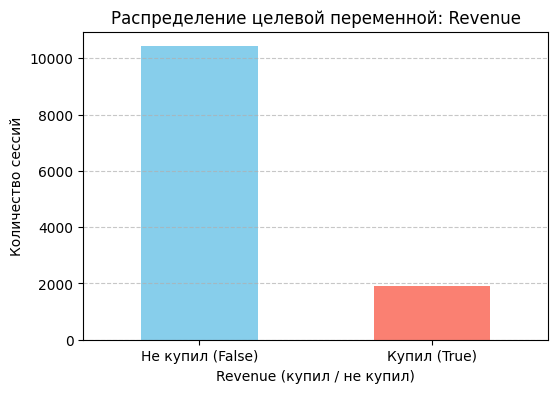

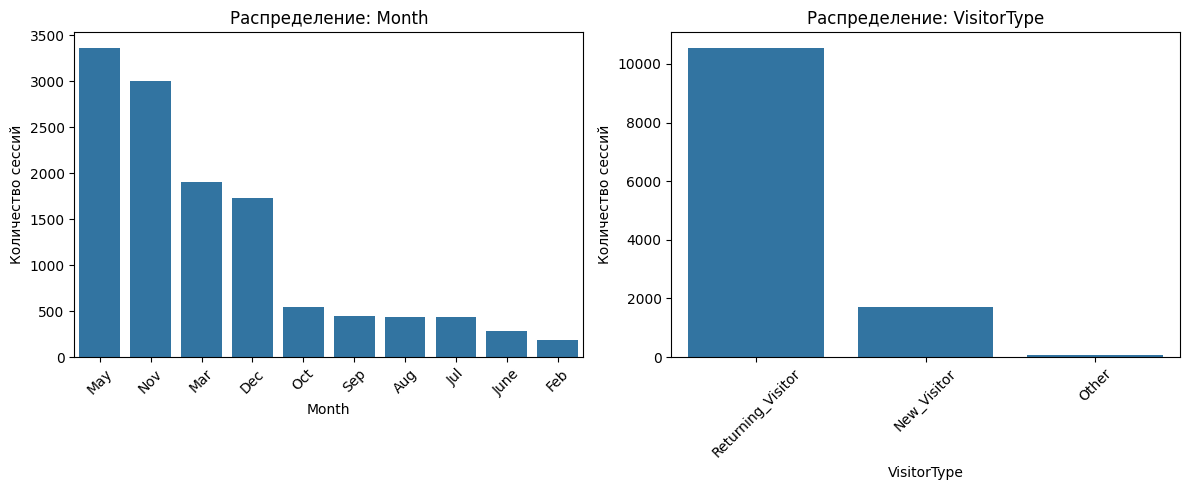


=== Распределение покупок по типу посетителя ===
                   Всего сессий  Покупок  Доля покупок
VisitorType                                           
New_Visitor                1694      422      0.249115
Other                        85       16      0.188235
Returning_Visitor         10551     1470      0.139323

=== Распределение покупок в зависимости от дня недели ===
         Всего сессий  Покупок  Доля покупок
Weekend                                     
False            9462     1409      0.148911
True             2868      499      0.173989

Пояснение:
  - Weekend = False -> сессия в будний день
  - Weekend = True  -> сессия в выходной день

Числовые признаки:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

=== Описательная статистика (describe) ===
       Administrative  A

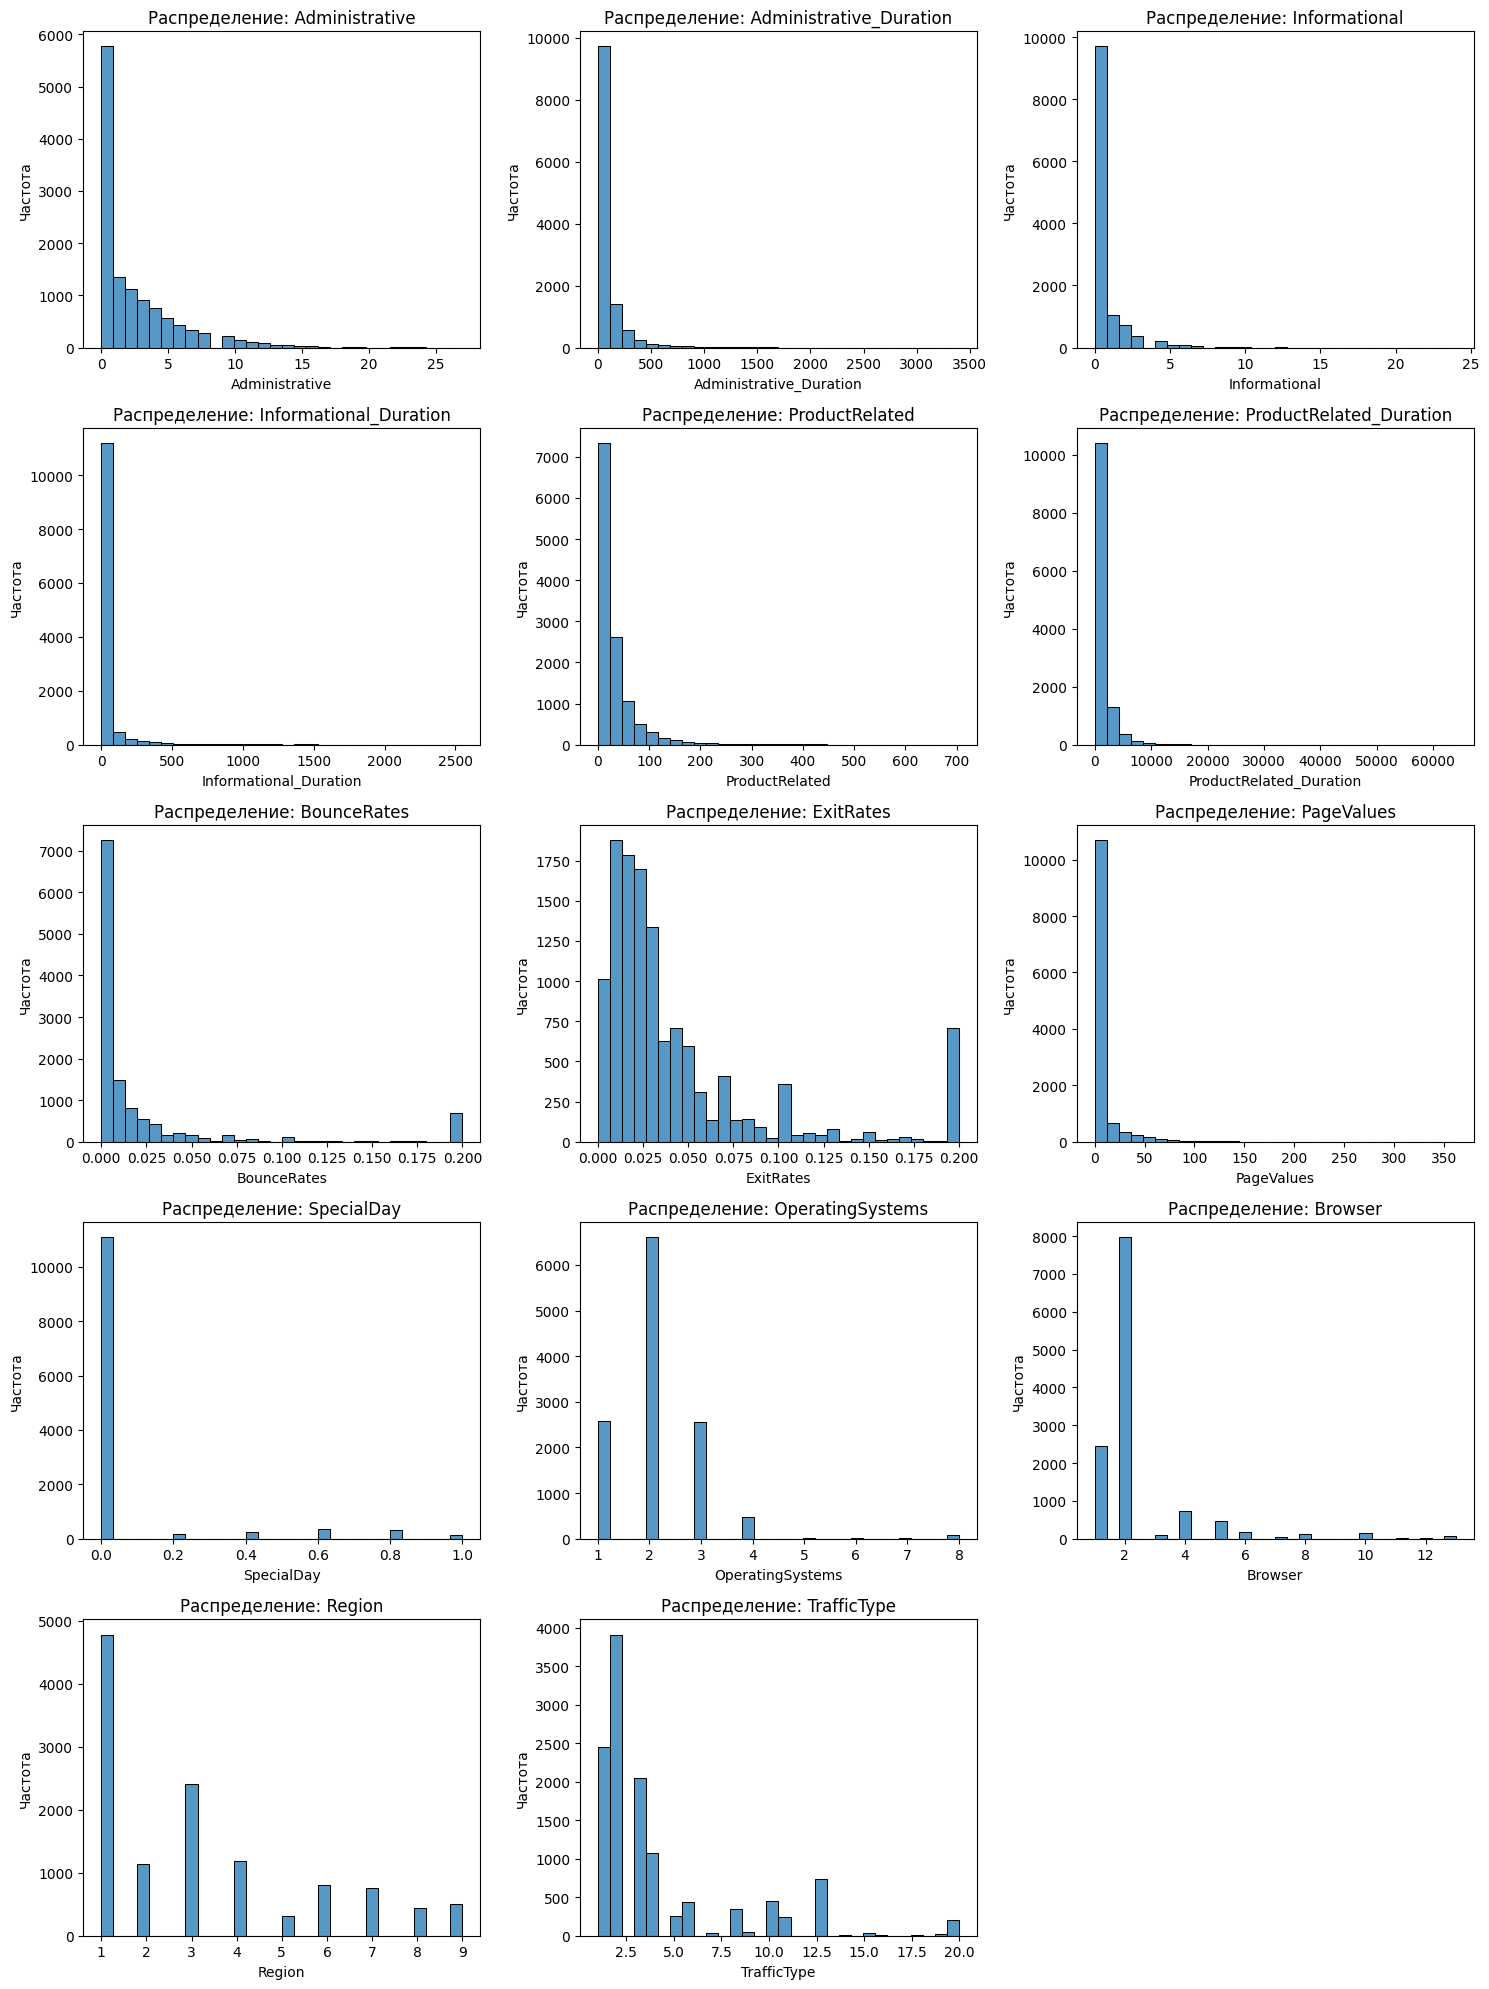


=== Бокс-плоты (анализ выбросов) ===


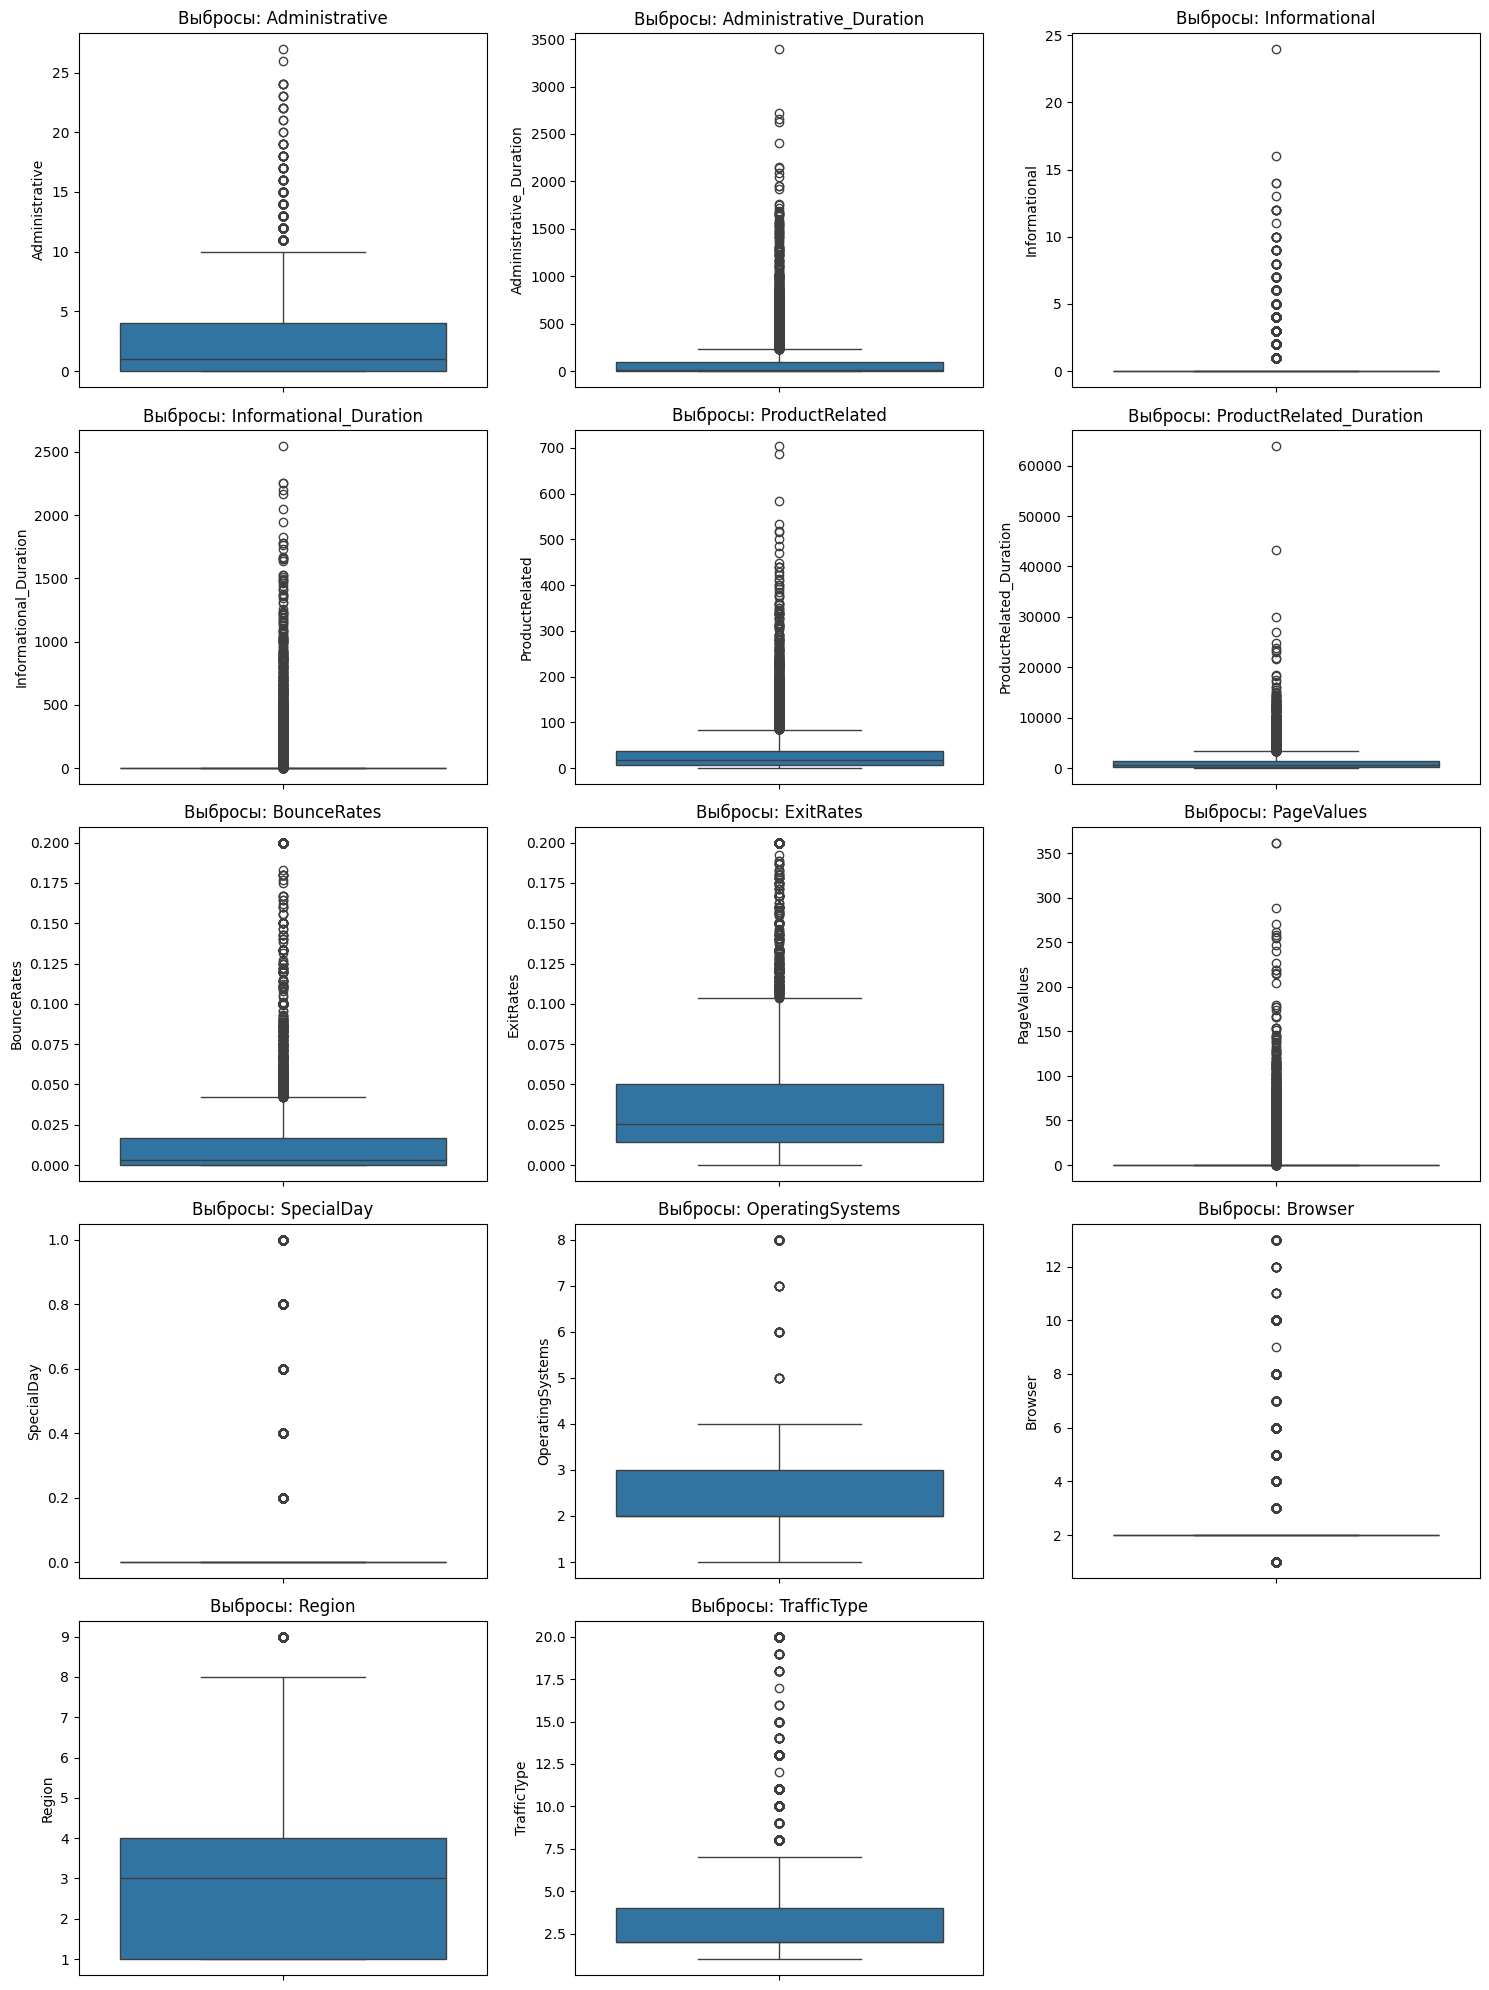


=== Интерпретация счётчиков посещений страниц ===

• Administrative :
  - Медиана = 1, 75% значений ≤ 4 — большинство пользователей заходит в этот раздел редко или не заходит вовсе.
  - 25% пользователей вообще не заходят в административные разделы (значение = 0).
  - Максимальное значение = 27 — это аномалия, возможно, бот или пользователь, который долго заполнял форму.
  - Вывод: так как этот признак не связан с покупкой, то основная масса пользователей его игнорирует.

• Informational :
  - Медиана = 0, 75% значений = 0 — почти никто не интересуется информацией.
  - Среднее = 0.5 — в среднем пользователь заходит в этот раздел менее одного раза.
  - Максимум = 24 — один пользователь был очень любопытен, но это исключение.
  - Вывод: этот признак не влияет на покупку, так как информация не является основной целью посетителя.

• ProductRelated :
  - Медиана = 18, 75% значений ≤ 38 — большинство пользователей активно изучают товары.
  - 25% пользователей просматривают менее 7 товаров —

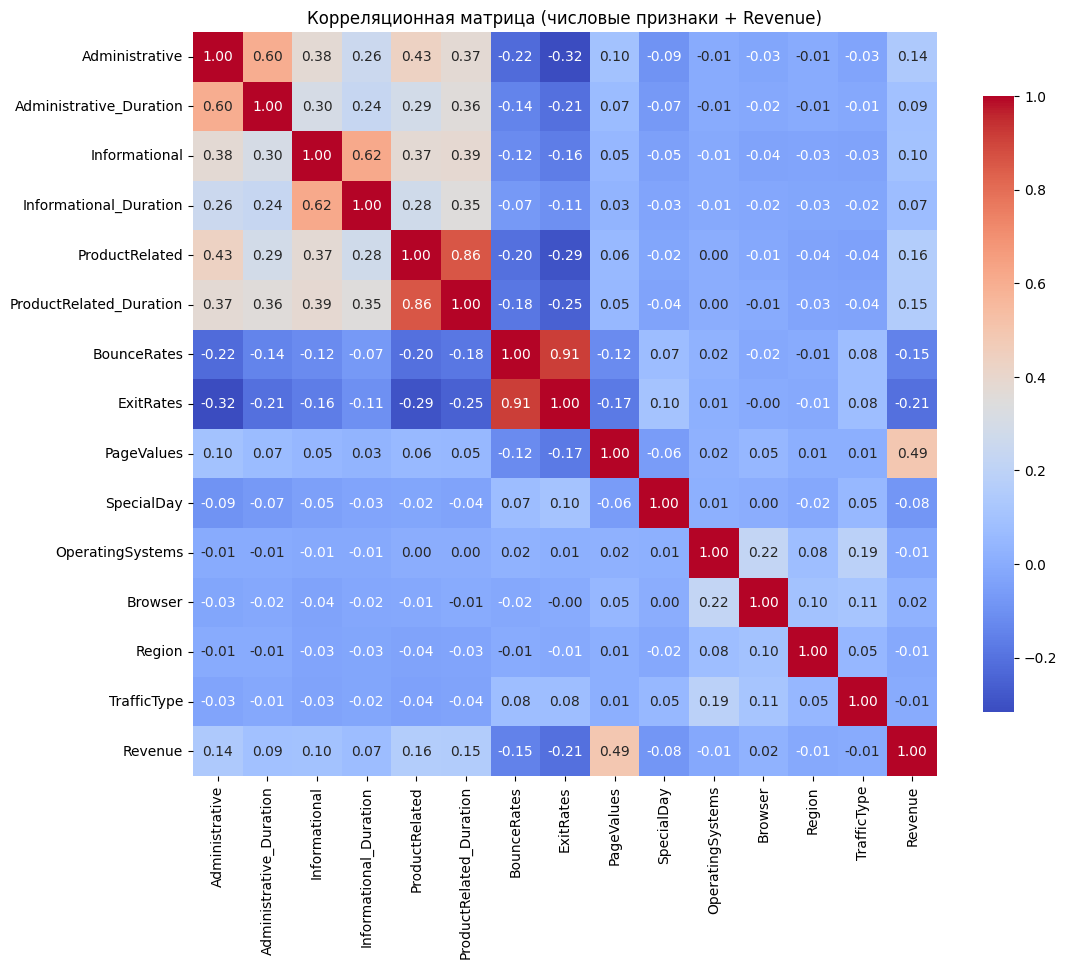


=== Признаки, коррелирующие с Revenue (|r| > 0.1) ===
PageValues                 0.492569
ExitRates                 -0.207071
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
Administrative             0.138917
Name: Revenue, dtype: float64

=== Сильно коррелирующие между собой признаки (|r| > 0.8) ===
ProductRelated  ProductRelated_Duration    0.860927
BounceRates     ExitRates                  0.913004
dtype: float64

=== Интерпретация корреляционной матрицы ===
• Наиболее сильно с целевой переменной `Revenue` коррелируют:
  - PageValues (r = 0.49) — чем выше ценность страницы, тем выше вероятность покупки.
  - ProductRelated (r = 0.16) — чем больше товаров просмотрено, тем выше шанс покупки.
  - BounceRates (r = -0.15) — чем ниже отказы, тем выше шанс покупки.

• Сильно коррелирующие между собой признаки (|r| > 0.8):
  - BounceRates и ExitRates (r = 0.91) — почти идентичны, один из них можно удалить.
  - ProductRelated и Pr

In [3]:
# Убираем лишние пробелы в названиях столбцов (на всякий случай)
df.columns = df.columns.str.strip()

# Выводим основную информацию
print("Названия столбцов:")
print(df.columns.tolist())
print("\nТипы данных:")
print(df.dtypes)
print("\nКоличество пропущенных значений по столбцам:")
missing = df.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("\nПропущенных значений нет!")
else:
    print(f"\nВсего пропущенных значений: {missing.sum()}")

# Категориальные, бинарные, числовые признаки
categorical_columns = [col for col in df.columns if df[col].dtype.name == 'object']
binary_columns = [col for col in df.columns if df[col].dtype.name == 'bool']
numerical_columns = [col for col in df.columns if df[col].dtype.name not in ['object', 'bool']]

print("Категориальные признаки (object):")
print(categorical_columns)
print("\nБинарные признаки (bool):")
print(binary_columns)
print("\nЧисловые признаки:")
print(numerical_columns)

# === Анализ целевой переменной ===
import matplotlib.pyplot as plt

revenue_counts = df['Revenue'].value_counts()
print("\nРаспределение целевой переменной 'Revenue':")
print(revenue_counts)

revenue_props = df['Revenue'].value_counts(normalize=True)
print("\nДоли классов:")
print(revenue_props)

plt.figure(figsize=(6, 4))
revenue_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение целевой переменной: Revenue')
plt.xlabel('Revenue (купил / не купил)')
plt.ylabel('Количество сессий')
plt.xticks(ticks=[0, 1], labels=['Не купил (False)', 'Купил (True)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# === Анализ категориальных признаков ===
import seaborn as sns

cat_features = categorical_columns
fig, axes = plt.subplots(1, len(cat_features), figsize=(6 * len(cat_features), 5))
if len(cat_features) == 1:
    axes = [axes]
for i, col in enumerate(cat_features):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Количество сессий')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# === Распределение покупок по типу посетителя ===
if 'VisitorType' in cat_features:
    print("\n=== Распределение покупок по типу посетителя ===")
    visitor_revenue = df.groupby('VisitorType')['Revenue'].agg(['count', 'sum', 'mean'])
    visitor_revenue.columns = ['Всего сессий', 'Покупок', 'Доля покупок']
    print(visitor_revenue)

# === Анализ Weekend ===
print("\n=== Распределение покупок в зависимости от дня недели ===")
weekend_revenue = df.groupby('Weekend')['Revenue'].agg(['count', 'sum', 'mean'])
weekend_revenue.columns = ['Всего сессий', 'Покупок', 'Доля покупок']
print(weekend_revenue)
print("\nПояснение:")
print("  - Weekend = False -> сессия в будний день")
print("  - Weekend = True  -> сессия в выходной день")

# === Анализ числовых признаков ===
num_features = [col for col in numerical_columns if col != 'Revenue']
print("\nЧисловые признаки:")
print(num_features)

print("\n=== Описательная статистика (describe) ===")
print(df[num_features].describe())

# Гистограммы
print("\n=== Гистограммы распределений числовых признаков ===")
n_cols = 3
n_rows = (len(num_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() if len(num_features) > 1 else [axes]
for i, col in enumerate(num_features):
    sns.histplot(df[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Бокс-плоты
print("\n=== Бокс-плоты (анализ выбросов) ===")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten() if len(num_features) > 1 else [axes]
for i, col in enumerate(num_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Выбросы: {col}')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# === Интерпретация числовых признаков ===
print("\n=== Интерпретация счётчиков посещений страниц ===\n")
print("• Administrative :")
print("  - Медиана = 1, 75% значений ≤ 4 — большинство пользователей заходит в этот раздел редко или не заходит вовсе.")
print("  - 25% пользователей вообще не заходят в административные разделы (значение = 0).")
print("  - Максимальное значение = 27 — это аномалия, возможно, бот или пользователь, который долго заполнял форму.")
print("  - Вывод: так как этот признак не связан с покупкой, то основная масса пользователей его игнорирует.")

print("\n• Informational :")
print("  - Медиана = 0, 75% значений = 0 — почти никто не интересуется информацией.")
print("  - Среднее = 0.5 — в среднем пользователь заходит в этот раздел менее одного раза.")
print("  - Максимум = 24 — один пользователь был очень любопытен, но это исключение.")
print("  - Вывод: этот признак не влияет на покупку, так как информация не является основной целью посетителя.")

print("\n• ProductRelated :")
print("  - Медиана = 18, 75% значений ≤ 38 — большинство пользователей активно изучают товары.")
print("  - 25% пользователей просматривают менее 7 товаров — они либо быстро находят нужное, либо уходят.")
print("  - Максимум = 705 — это аномалия, возможно, пользователь, который долго сравнивал товары.")
print("  - Вывод: этот признак сильно связан с покупкой — чем больше товаров просмотрено, тем выше шанс совершить покупку.")

print("\n=== Интерпретация признаков длительности ===\n")
print("• Administrative_Duration :")
print("  - Медиана = 7.5 секунд, 25% пользователей вообще не тратят времени (значение = 0).")
print("  - 75% пользователей проводят менее 93 секунд (~1.5 минуты) в этом разделе.")
print("  - Максимум = 3398 секунд — один пользователь провёл почти час, но это аномалия.")
print("  - Вывод: этот признак слабо коррелирует с покупкой, так как основная масса пользователей его игнорирует.")

print("\n• Informational_Duration :")
print("  - Медиана = 0, 75% значений = 0 — почти никто не тратит время на информацию.")
print("  - Среднее = 34 секунды — в среднем пользователь проводит меньше минуты.")
print("  - Максимум = 2549 секунд (~42 минуты) — один пользователь был очень любопытен, но это исключение.")
print("  - Вывод: этот признак, скорее всего, не влияет на покупку, так как информация не является основной целью посетителя.")

print("\n• ProductRelated_Duration :")
print("  - Медиана = 599 секунд (~10 минут), 75% пользователей проводят менее 24 минут на товарах.")
print("  - 25% пользователей тратят менее 3 минут — они либо быстро находят нужное, либо уходят.")
print("  - Максимум = 63973 секунд (~17.7 часов) — это аномалия, возможно, пользователь, который забыл закрыть вкладку.")
print("  - Вывод: этот признак сильно связан с покупкой — чем дольше пользователь изучает товары, тем выше шанс совершить покупку.")

print("\n=== Интерпретация поведенческих признаков: BounceRates, ExitRates, PageValues ===\n")
print("• BounceRates :")
print("  - Медиана = 0.0031 — большинство сессий не являются 'отказами'.")
print("  - 75% значений ≤ 0.0168 — только 25% сессий имеют высокий показатель отказов.")
print("  - Максимум = 0.2 — в худшем случае 20% пользователей уходят сразу, но это редкость.")
print("  - Вывод: низкий BounceRate может быть признаком вовлечённости и предвестником покупки.")

print("\n• ExitRates :")
print("  - Медиана = 0.025 — в среднем 2.5% просмотров завершаются на данной странице.")
print("  - 75% значений ≤ 0.05 — большинство страниц не являются 'финальными'.")
print("  - Максимум = 0.2 — в редких случаях страница завершает все сессии.")
print("  - Вывод: ExitRates менее информативен, чем BounceRates, но всё же может указывать на 'тупиковые' страницы.")

print("\n• PageValues :")
print("  - Медиана = 0, 75% значений = 0 — большинство страниц не ведут к покупке.")
print("  - Среднее = 5.89 — за счёт редких, но очень ценных страниц (максимум = 361.76).")
print("  - Это ключевой признак: высокий PageValues почти всегда означает, что пользователь близок к покупке.")
print("  - Вывод: PageValues — один из самых важных предикторов для модели.")

print("\n=== Интерпретация SpecialDay и технических признаков ===\n")
print("• SpecialDay :")
print("  - 75% значений = 0 -> абсолютное большинство сессий — в обычные дни.")
print("  - Максимум = 1.0 — означает день, максимально близкий к празднику (например, 8 февраля для Valentine's Day).")
print("  - Среднее = 0.06 — только небольшая часть пользователей посещает сайт в праздничные периоды.")
print("  - Вывод: этот признак, вероятно, слабо влияет на вероятность покупки, так как праздничные дни редки.")

print("\n• Технические признаки (OperatingSystems, Browser, Region, TrafficType):")
print("  - Все они закодированы целыми числами от 1 до максимума (например, Browser: 1–13).")
print("  - Распределение неравномерное: некоторые ОС/браузеры/регионы/источники трафика встречаются чаще других.")
print("  - Например, Browser = 2 и TrafficType = 2 доминируют — это, скорее всего, популярные браузер и источник трафика.")
print("  - Вывод: эти признаки могут быть полезны, если, например, пользователи из определённого региона или через определённый источник чаще совершают покупки.")

# === Корреляционная матрица ===
import numpy as np

df_corr = df.copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)
numeric_for_corr = [col for col in numerical_columns if col != 'Revenue'] + ['Revenue']
corr_matrix = df_corr[numeric_for_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title("Корреляционная матрица (числовые признаки + Revenue)")
plt.show()

# Признаки, коррелирующие с Revenue
print("\n=== Признаки, коррелирующие с Revenue (|r| > 0.1) ===")
revenue_corr = corr_matrix['Revenue'].drop('Revenue')
strong_corr = revenue_corr[revenue_corr.abs() > 0.1].sort_values(key=abs, ascending=False)
print(strong_corr)

# Сильно коррелирующие между собой
print("\n=== Сильно коррелирующие между собой признаки (|r| > 0.8) ===")
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = upper.stack().abs() > 0.8
if high_corr_pairs.any():
    print(upper.stack()[high_corr_pairs])
else:
    print("Сильно коррелирующих признаков (|r| > 0.8) не найдено.")

# Интерпретация корреляции
print("\n=== Интерпретация корреляционной матрицы ===")
print("• Наиболее сильно с целевой переменной `Revenue` коррелируют:")
print("  - PageValues (r = 0.49) — чем выше ценность страницы, тем выше вероятность покупки.")
print("  - ProductRelated (r = 0.16) — чем больше товаров просмотрено, тем выше шанс покупки.")
print("  - BounceRates (r = -0.15) — чем ниже отказы, тем выше шанс покупки.")
print("\n• Сильно коррелирующие между собой признаки (|r| > 0.8):")
print("  - BounceRates и ExitRates (r = 0.91) — почти идентичны, один из них можно удалить.")
print("  - ProductRelated и ProductRelated_Duration (r = 0.86) — оба отражают активность пользователя,")
print("    можно оставить только один (например, ProductRelated).")
print("\n• Для улучшения модели стоит:")
print("  - Удалить один из сильно коррелирующих признаков (например, ExitRates или ProductRelated_Duration),")
print("    чтобы избежать мультиколлинеарности.")
print("  - Оставить все признаки с |r| > 0.1 с Revenue — они могут быть полезны для предсказания.")

## 3. Обработка пропущенных значений и некорректных данных

Проверяем:
- наличие пропущенных значений,
- логические несогласованности (например, длительность > 0 при числе посещений = 0),
- выбросы (строки вне квантилей 0.005–0.995),
- итоговый размер датасета после очистки.

In [4]:
# === Поиск и обработка некорректных данных ===
print("=== Поиск и обработка некорректных данных ===")

# 0. Проверка пропущенных значений
print("\n0. Проверка пропущенных значений:")
missing_before = df.isnull().sum()
if missing_before.sum() == 0:
    print("  -> Пропущенных значений в исходных данных нет.")
else:
    print(missing_before[missing_before > 0])

# 1. Логические несогласованности (оставляем как есть)
inconsistent_admin = df[(df['Administrative'] == 0) & (df['Administrative_Duration'] > 0)]
inconsistent_info = df[(df['Informational'] == 0) & (df['Informational_Duration'] > 0)]
inconsistent_prod = df[(df['ProductRelated'] == 0) & (df['ProductRelated_Duration'] > 0)]
print(f"\n1. Логические несогласованности:")
print(f"  • Административные: {len(inconsistent_admin)} строк")
print(f"  • Информационные: {len(inconsistent_info)} строк")
print(f"  • Продуктовые: {len(inconsistent_prod)} строк")

# Исправляем: если посещений = 0, то длительность = 0
df_clean = df.copy()
df_clean.loc[df_clean['Administrative'] == 0, 'Administrative_Duration'] = 0
df_clean.loc[df_clean['Informational'] == 0, 'Informational_Duration'] = 0
df_clean.loc[df_clean['ProductRelated'] == 0, 'ProductRelated_Duration'] = 0
print("\n  -> Исправлено: длительность = 0, если посещений = 0.")

# 2. Удаление выбросов через квантили (0.005 и 0.995)
print("\n2. Удаление выбросов через квантили (0.005 и 0.995):")
# Выбираем числовые признаки (без Revenue)
numerical_columns = [col for col in df.columns if df[col].dtype.name not in ['object', 'bool']]
numeric_for_outliers = [col for col in numerical_columns if col != 'Revenue']

# Для каждого числового признака находим квантили
outlier_mask = pd.Series([False] * len(df_clean), index=df_clean.index)
for col in numeric_for_outliers:
    q_low = df_clean[col].quantile(0.005)
    q_high = df_clean[col].quantile(0.995)
    outlier_mask |= (df_clean[col] < q_low) | (df_clean[col] > q_high)

print(f"  • Всего строк до удаления: {len(df_clean)}")
print(f"  • Строк, попадающих в выбросы: {outlier_mask.sum()}")
# Удаляем выбросы
df_clean = df_clean[~outlier_mask]
print(f"  • Осталось строк после удаления: {len(df_clean)}")

# 3. Итоговая проверка пропусков
missing_after = df_clean.isnull().sum()
if missing_after.sum() == 0:
    print("\nПосле обработки пропущенных значений нет.")
else:
    print("\nОбнаружены пропущенные значения:")
    print(missing_after[missing_after > 0])

# Финальные размеры
print(f"\nИсходный размер: {df.shape}")
print(f"Размер после очистки: {df_clean.shape}")
print(f"Удалено строк: {df.shape[0] - df_clean.shape[0]}")

=== Поиск и обработка некорректных данных ===

0. Проверка пропущенных значений:
  -> Пропущенных значений в исходных данных нет.

1. Логические несогласованности:
  • Административные: 0 строк
  • Информационные: 0 строк
  • Продуктовые: 0 строк

  -> Исправлено: длительность = 0, если посещений = 0.

2. Удаление выбросов через квантили (0.005 и 0.995):
  • Всего строк до удаления: 12330
  • Строк, попадающих в выбросы: 415
  • Осталось строк после удаления: 11915

После обработки пропущенных значений нет.

Исходный размер: (12330, 18)
Размер после очистки: (11915, 18)
Удалено строк: 415


## 4. Обработка категориальных признаков 
## и
## 12. Исключение коррелирующих переменных

Категориальные признаки `Month` и `VisitorType` преобразованы методом **one-hot encoding** с помощью `pd.get_dummies()`.  
Все булевые столбцы, созданные при кодировании, приведены к типу `int` для единообразия.  
Проверено, что после кодирования категориальных признаков больше не осталось.

=== Обработка категориальных признаков ===
• Удалены коррелирующие признаки: ['ExitRates', 'ProductRelated_Duration']


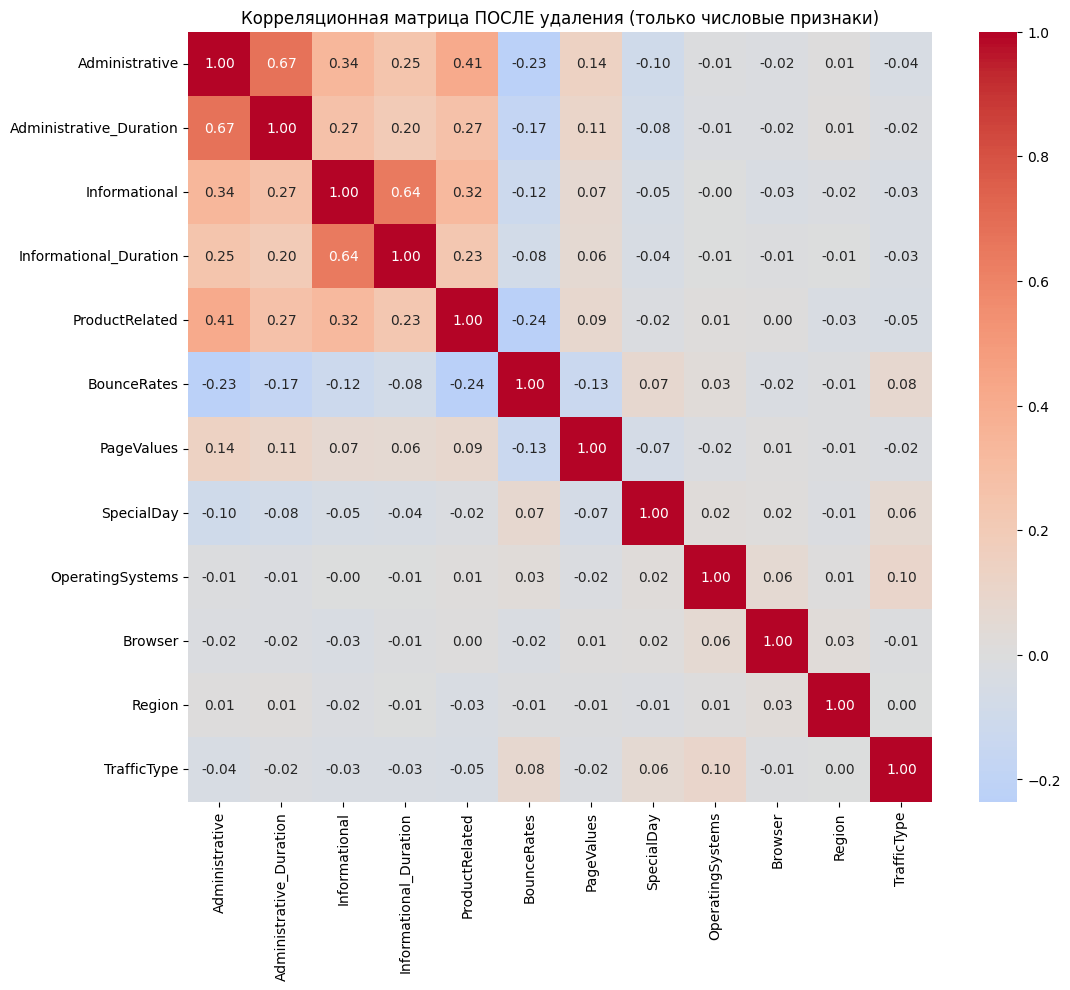


=== Проверка остаточных корреляций (|r| > 0.8) ===
Сильно коррелирующих пар (|r| > 0.8) больше нет.
• Категориальные признаки для кодирования: ['Month', 'VisitorType']
• Число столбцов до кодирования: 16
• Число столбцов после кодирования: 27
• Все категориальные признаки успешно закодированы.

Типы данных:
Administrative                     int64
Administrative_Duration          float64
Informational                      int64
Informational_Duration           float64
ProductRelated                     int64
BounceRates                      float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                   int64
Browser                            int64
Region                             int64
TrafficType                        int64
Weekend                            int64
Revenue                            int64
Month_Aug                          int64
Month_Dec                          int64
Month_Feb                         

In [5]:
# === Обработка категориальных признаков ===
print("=== Обработка категориальных признаков ===")

# Отделяем y временно
y = df_clean['Revenue']
X_temp = df_clean.drop('Revenue', axis=1)

# Удаляем коррелирующие признаки (согласно пункту 12, но делаем это здесь для корректности последовательности)
cols_to_drop = ['ExitRates', 'ProductRelated_Duration']
X_no_corr = X_temp.drop(columns=cols_to_drop, errors='ignore')
print(f"• Удалены коррелирующие признаки: {cols_to_drop}")

# === Проверка: Корреляционная матрица ПОСЛЕ удаления (только числовые признаки) ===
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем ТОЛЬКО числовые столбцы из X_no_corr (исключаем 'Month', 'VisitorType')
X_no_corr_numeric = X_no_corr.select_dtypes(include=[np.number])

# Строим корреляционную матрицу ТОЛЬКО по числовым признакам
corr_after = X_no_corr_numeric.corr()

# Визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_after, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Корреляционная матрица ПОСЛЕ удаления (только числовые признаки)")
plt.show()

# Проверяем, остались ли корреляции > 0.8
print("\n=== Проверка остаточных корреляций (|r| > 0.8) ===")
upper_triangle = corr_after.where(np.triu(np.ones(corr_after.shape), k=1).astype(bool))
high_corr = upper_triangle.stack().abs() > 0.8
if high_corr.any():
    print("Остались сильно коррелирующие признаки:")
    print(upper_triangle.stack()[high_corr])
else:
    print("Сильно коррелирующих пар (|r| > 0.8) больше нет.")

# Восстанавливаем y
df_for_encoding = pd.concat([X_no_corr, y], axis=1)

# Кодируем категориальные признаки
categorical_cols = df_for_encoding.select_dtypes(include=['object']).columns.tolist()
print(f"• Категориальные признаки для кодирования: {categorical_cols}")

df_encoded = pd.get_dummies(
    df_for_encoding,
    columns=categorical_cols,
    prefix=categorical_cols,
    drop_first=False
)

# Преобразуем bool в int
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(f"• Число столбцов до кодирования: {df_for_encoding.shape[1]}")
print(f"• Число столбцов после кодирования: {df_encoded.shape[1]}")

# Проверка
remaining_cat = df_encoded.select_dtypes(include=['object']).columns
if len(remaining_cat) == 0:
    print("• Все категориальные признаки успешно закодированы.")
else:
    print(f"Остались необработанные категориальные признаки: {remaining_cat}")

# Вывод типов и пропусков
print("\nТипы данных:")
print(df_encoded.dtypes)
print("\nКоличество пропущенных значений по столбцам:")
missing = df_encoded.isnull().sum()
print(missing[missing > 0])
if missing.sum() == 0:
    print("\nПропущенных значений нет!")

## 5. Нормализация данных

Поскольку в задаче используется модель **kNN**, чувствительная к масштабу признаков, все **исходные числовые признаки** подвергнуты **стандартизации**:

$$ z = \frac{x - \mu}{\sigma} $$

Нормализации подверглись 12 признаков:
- `Administrative`
- `Administrative_Duration`
- `Informational`
- `Informational_Duration`
- `ProductRelated`
- `BounceRates`
- `PageValues`
- `SpecialDay`
- `OperatingSystems`
- `Browser`
- `Region`
- `TrafficType`

Категориальные признаки (после one-hot) и бинарные (`Weekend`) **не нормализовались**, так как принимают значения 0/1.

Проверка на примере `PageValues` подтверждает корректность преобразования: среднее ≈ 0, стандартное отклонение = 1.

In [6]:
# Часть 6. Нормализация данных
# 1. Отделяем целевую переменную
y_final = df_encoded['Revenue']
X_raw = df_encoded.drop('Revenue', axis=1)

# 2. Определим, какие признаки НОРМАЛИЗОВАТЬ (только исходные числовые)
original_numerical = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'BounceRates',
    'PageValues', 'SpecialDay',
    'OperatingSystems', 'Browser',
    'Region', 'TrafficType'
]

# Удалим те, что уже исключены на шаге 12
numerical_to_scale = [col for col in original_numerical if col in X_raw.columns]
print(f"• Признаки для нормализации ({len(numerical_to_scale)} шт.):")
print(numerical_to_scale)

# 3. Стандартизация: (x - mean) / std
X_scaled = X_raw.copy()
X_scaled[numerical_to_scale] = (
    X_raw[numerical_to_scale] - X_raw[numerical_to_scale].mean()
) / X_raw[numerical_to_scale].std()

# 4. Проверим результат на одном признаке
print(f"\n• Пример (PageValues):")
print(f"   До: mean={X_raw['PageValues'].mean():.2f}, std={X_raw['PageValues'].std():.2f}")
print(f"   После: mean={X_scaled['PageValues'].mean():.2f}, std={X_scaled['PageValues'].std():.2f}")

# 5. Финальные данные для обучения
print(f"\nГотово! Финальный набор:")
print(f"   X.shape = {X_scaled.shape}, y.shape = {y_final.shape}")

• Признаки для нормализации (12 шт.):
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']

• Пример (PageValues):
   До: mean=5.03, std=14.00
   После: mean=-0.00, std=1.00

Готово! Финальный набор:
   X.shape = (11915, 26), y.shape = (11915,)


## 11. Борьба с несбалансированностью классов

Целевая переменная `Revenue` **несбалансирована**:
- **85.15%** — не купили (`False`),
- **14.85%** — купили (`True`).

Такой дисбаланс может привести к тому, что модель будет игнорировать редкий класс (покупателей), что недопустимо в бизнес-задаче.

Для борьбы с этим:
- В моделях, поддерживающих параметр `class_weight`, используется **`class_weight='balanced'`**.
- Это автоматически пересчитывает веса классов обратно пропорционально их частоте:

$$
w_j = \frac{n}{k \cdot n_j}
$$

где:
- \(n\) — общее число объектов,
- \(k\) — число классов,
- \(n_j\) — число объектов класса \(j\).

Этот подход применяется в моделях **Random Forest**, **Extra Trees** и других, но **не в kNN и AdaBoost** (они не поддерживают `class_weight`).

In [7]:
# Анализ баланса классов и подготовка к борьбе с дисбалансом
class_balance = y_final.value_counts(normalize=True)
print("=== Баланс классов ===")
print(f"• Не купили (0): {class_balance[0]:.2%}")
print(f"• Купили (1):    {class_balance[1]:.2%}")

if class_balance.min() < 0.2:
    print("\n• Обнаружен умеренный дисбаланс классов.")
    print("• Для моделей, поддерживающих class_weight, будет использован параметр class_weight='balanced'.")
    print("• Это автоматически увеличит вес редкого класса (покупатели), чтобы модель не игнорировала их.")

=== Баланс классов ===
• Не купили (0): 85.15%
• Купили (1):    14.85%

• Обнаружен умеренный дисбаланс классов.
• Для моделей, поддерживающих class_weight, будет использован параметр class_weight='balanced'.
• Это автоматически увеличит вес редкого класса (покупатели), чтобы модель не игнорировала их.


## 6. Разбиение данных на обучающую и тестовую выборки

Данные разбиты в соотношении **80% / 20%** с использованием `train_test_split`.  
Для сохранения пропорций классов (из-за дисбаланса) применён параметр `stratify=y_final`.  
Установлен `random_state=52` для воспроизводимости результатов.

In [8]:
from sklearn.model_selection import train_test_split

# Разбиваем в пропорции 80% / 20%
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_final,
    test_size=0.2,           # 20% — тест
    stratify=y_final,        # сохраняем пропорции классов
    random_state=52          # для воспроизводимости
)

print("=== Размеры выборок ===")
print(f"• Обучающая выборка: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"• Тестовая выборка:  X_test  = {X_test.shape},  y_test  = {y_test.shape}")

# Проверим баланс классов в train и test
print(f"\n• Баланс в train: 0 = {(y_train == 0).mean():.2%}, 1 = {(y_train == 1).mean():.2%}")
print(f"• Баланс в test:  0 = {(y_test == 0).mean():.2%}, 1 = {(y_test == 1).mean():.2%}")

=== Размеры выборок ===
• Обучающая выборка: X_train = (9532, 26), y_train = (9532,)
• Тестовая выборка:  X_test  = (2383, 26),  y_test  = (2383,)

• Баланс в train: 0 = 85.16%, 1 = 14.84%
• Баланс в test:  0 = 85.14%, 1 = 14.86%


## 7. Обучение базовой модели kNN

Выбрана модель **k ближайших соседей (kNN)** по следующим причинам:
- Простота и интерпретируемость.
- Отсутствие предположений о распределении данных (непараметрическая модель).
- Хорошо работает при наличии локальных паттернов (похожие сессии -> похожий исход).
- Чувствительна к масштабу признаков — позволяет проверить корректность нормализации.

Для расстояния используется **манхэттенская метрика** (`p=1`), так как она часто лучше работает с разреженными и категориальными данными.

=== Модель kNN (k=7) ===
• Точность на train: 0.9023 (90.23%)
• Точность на test:  0.8791 (87.91%)


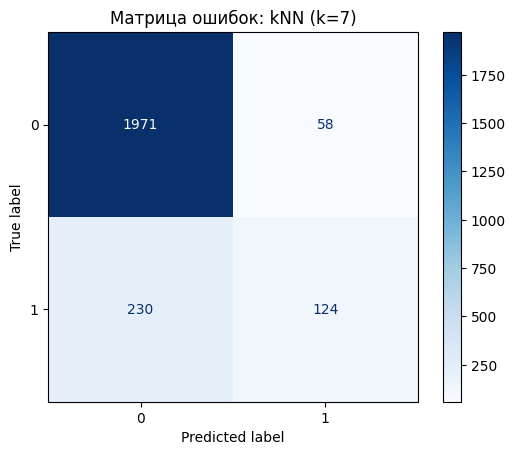


=== Classification Report (kNN, k=7) ===
              precision    recall  f1-score   support

    Не купил       0.90      0.97      0.93      2029
       Купил       0.68      0.35      0.46       354

    accuracy                           0.88      2383
   macro avg       0.79      0.66      0.70      2383
weighted avg       0.86      0.88      0.86      2383



In [9]:
# === Обучение модели kNN ===
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Создаём модель kNN с начальным k=7 и манхэттенским расстоянием
knn_model = KNeighborsClassifier(n_neighbors=7, p=1)

# Обучаем на обучающей выборке
knn_model.fit(X_train, y_train)

# Делаем предсказания
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Считаем точность
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("=== Модель kNN (k=7) ===")
print(f"• Точность на train: {train_acc:.4f} ({train_acc * 100:.2f}%)")
print(f"• Точность на test:  {test_acc:.4f} ({test_acc * 100:.2f}%)")

# Матрица ошибок
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Матрица ошибок: kNN (k=7)")
plt.show()

# Подробный отчёт
print("\n=== Classification Report (kNN, k=7) ===")
print(classification_report(y_test, y_test_pred, target_names=['Не купил', 'Купил']))

## 8. Подбор оптимального значения k

Параметр `k` (число соседей) сильно влияет на качество модели:
- При малом `k` — модель переобучается (шум воспринимается как сигнал).
- При большом `k` — модель недообучается (теряются локальные особенности).

Оптимальное `k` подбирается по **F1-score для класса «Купил»**, поскольку:
- Целевая переменная **несбалансирована** (85.15% — не купили, 14.85% — купили),
- **Accuracy в этом случае неинформативна**: модель может достичь ~85% точности, просто предсказывая «не купил», но это бесполезно для бизнеса,
- Для компании критически важно **не пропустить реальных покупателей** (высокий **recall**), но при этом **избегать излишних ложных срабатываний** (высокая **precision**),
- **F1-score** — гармоническое среднее между precision и recall — идеально балансирует эти два требования и является стандартной метрикой для задач с дисбалансом при фокусе на редком классе.

Поиск проводится по диапазону `k = 1..30`. Результаты визуализируются.

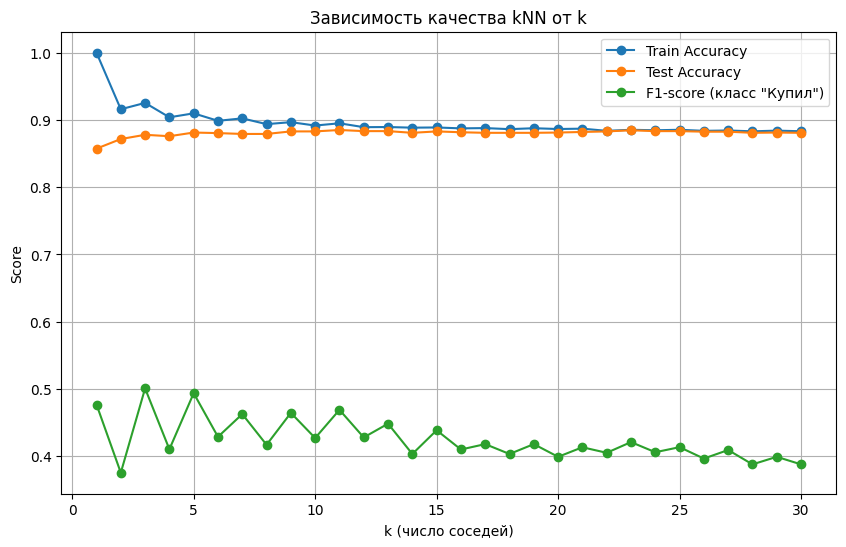

• Лучшее k по F1-score: 3
• F1-score при k=3: 0.5009


In [10]:
# === Подбор оптимального k ===
from sklearn.metrics import f1_score
import numpy as np

# Диапазон значений k
k_range = range(1, 31)
train_scores = []
test_scores = []
f1_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(X_train, y_train)
    # Оценка на train и test
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    f1 = f1_score(y_test, knn.predict(X_test))
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    f1_scores.append(f1)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(k_range, test_scores, label='Test Accuracy', marker='o')
plt.plot(k_range, f1_scores, label='F1-score (класс "Купил")', marker='o')
plt.xlabel('k (число соседей)')
plt.ylabel('Score')
plt.title('Зависимость качества kNN от k')
plt.legend()
plt.grid(True)
plt.show()

# Найдём оптимальное k по F1-score
best_k = k_range[np.argmax(f1_scores)]
best_f1 = max(f1_scores)
print(f"• Лучшее k по F1-score: {best_k}")
print(f"• F1-score при k={best_k}: {best_f1:.4f}")

## Финальная модель kNN с оптимальным k

Используем найденное значение `k` (см. вывод в предыдущей ячейке) для финальной оценки модели.

=== Финальная модель kNN (k = 3) ===
• Точность на тесте: 0.8779 (87.79%)
• F1-score (класс 'Купил'): 0.5009


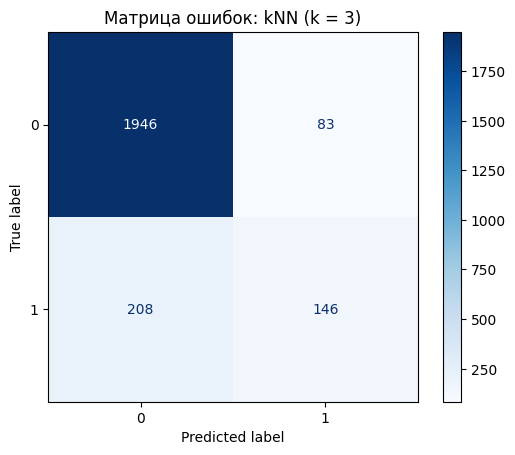


=== Classification Report (Финальная kNN) ===
              precision    recall  f1-score   support

    Не купил       0.90      0.96      0.93      2029
       Купил       0.64      0.41      0.50       354

    accuracy                           0.88      2383
   macro avg       0.77      0.69      0.72      2383
weighted avg       0.86      0.88      0.87      2383



In [11]:
# === Финальная модель kNN с оптимальным k ===
knn_final = KNeighborsClassifier(n_neighbors=best_k, p=1)
knn_final.fit(X_train, y_train)

# Предсказания
y_test_pred_final = knn_final.predict(X_test)

# Метрики
final_test_acc = accuracy_score(y_test, y_test_pred_final)
final_f1 = f1_score(y_test, y_test_pred_final)

print(f"=== Финальная модель kNN (k = {best_k}) ===")
print(f"• Точность на тесте: {final_test_acc:.4f} ({final_test_acc * 100:.2f}%)")
print(f"• F1-score (класс 'Купил'): {final_f1:.4f}")

# Матрица ошибок
cm_final = confusion_matrix(y_test, y_test_pred_final)
ConfusionMatrixDisplay(confusion_matrix=cm_final).plot(cmap='Blues')
plt.title(f"Матрица ошибок: kNN (k = {best_k})")
plt.show()

# Подробный отчёт
print("\n=== Classification Report (Финальная kNN) ===")
print(classification_report(y_test, y_test_pred_final, target_names=['Не купил', 'Купил']))

## 9. Ошибки на обучающей и тестовой выборках

Для базовой модели **kNN** (с оптимальным `k = 3`) вычислены:
- **Точность (`accuracy`)** на обучающей и тестовой выборках,
- **Матрица ошибок**,
- **Classification report** (precision, recall, F1-score по классам).

Особое внимание уделено **классу "Купил" (1)**, так как он редкий и критичен для бизнеса.

Наблюдается:
- Высокая точность на обеих выборках (~88%),
- Но **низкий recall** для класса "Купил" (41%) -> модель пропускает ~59% реальных покупателей.

=== Ошибки модели kNN (k=3) ===
• Точность на train: 0.9253 (92.53%)
• Точность на test:  0.8779 (87.79%)


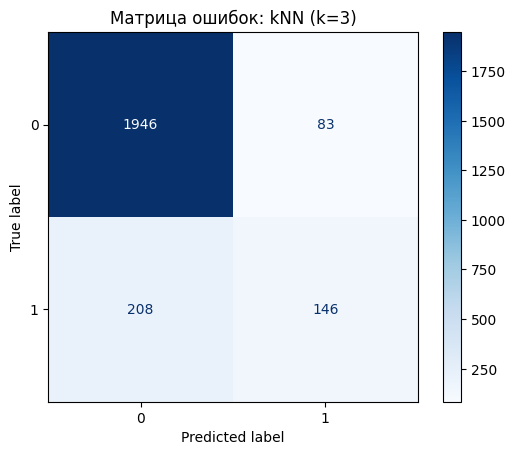


=== Classification Report (kNN, k=3) ===
              precision    recall  f1-score   support

    Не купил       0.90      0.96      0.93      2029
       Купил       0.64      0.41      0.50       354

    accuracy                           0.88      2383
   macro avg       0.77      0.69      0.72      2383
weighted avg       0.86      0.88      0.87      2383



In [12]:
# === Ошибки на train и test для финальной модели kNN ===
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Используем уже обученную модель knn_final и предсказания
train_acc_knn = accuracy_score(y_train, knn_final.predict(X_train))
test_acc_knn = accuracy_score(y_test, y_test_pred_final)

print("=== Ошибки модели kNN (k=3) ===")
print(f"• Точность на train: {train_acc_knn:.4f} ({train_acc_knn * 100:.2f}%)")
print(f"• Точность на test:  {test_acc_knn:.4f} ({test_acc_knn * 100:.2f}%)")

# Матрица ошибок
cm = confusion_matrix(y_test, y_test_pred_final)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Матрица ошибок: kNN (k=3)")
plt.show()

# Подробный отчёт
print("\n=== Classification Report (kNN, k=3) ===")
print(classification_report(y_test, y_test_pred_final, target_names=['Не купил', 'Купил']))

## 10. Сравнение с другими классификаторами

Протестированы три ансамблевые модели:
- **Random Forest**
- **Extra Trees**
- **AdaBoost**

Сначала модели запускаются с **фиксированными параметрами** (базовая оценка).  
Затем — с **подбором гиперпараметров через `GridSearchCV`** с оптимизацией по **F1-score для класса "Купил"**.

Во всех моделях, где это возможно, используется `class_weight='balanced'` для борьбы с дисбалансом классов.

Цель — сравнить качество с базовой моделью **kNN** и выбрать лучшую.


=== Обучение: Random Forest ===
• Accuracy: 0.8968
• F1-score (class 'Купил'): 0.6120


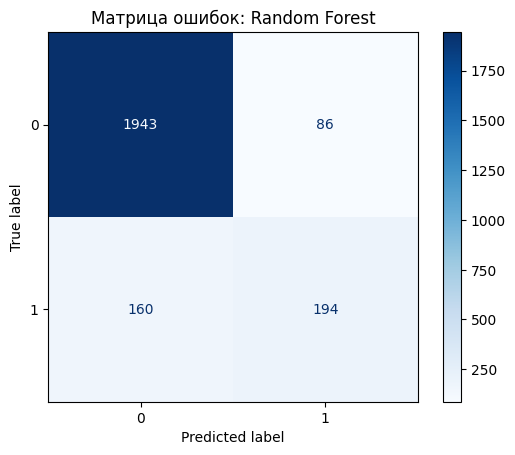


=== Classification Report ===
              precision    recall  f1-score   support

    Не купил       0.92      0.96      0.94      2029
       Купил       0.69      0.55      0.61       354

    accuracy                           0.90      2383
   macro avg       0.81      0.75      0.78      2383
weighted avg       0.89      0.90      0.89      2383


=== Обучение: Extra Trees ===
• Accuracy: 0.8884
• F1-score (class 'Купил'): 0.5507


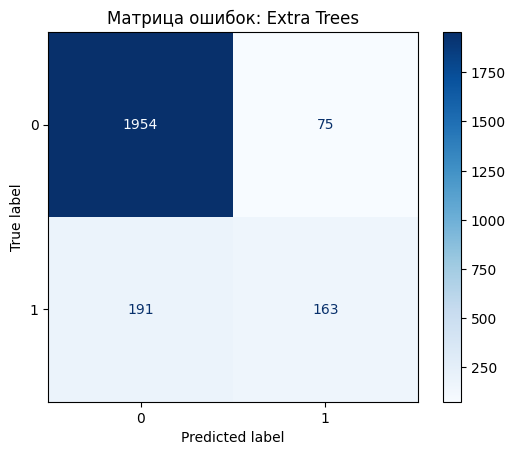


=== Classification Report ===
              precision    recall  f1-score   support

    Не купил       0.91      0.96      0.94      2029
       Купил       0.68      0.46      0.55       354

    accuracy                           0.89      2383
   macro avg       0.80      0.71      0.74      2383
weighted avg       0.88      0.89      0.88      2383


=== Обучение: AdaBoost ===
• Accuracy: 0.8838
• F1-score (class 'Купил'): 0.5771


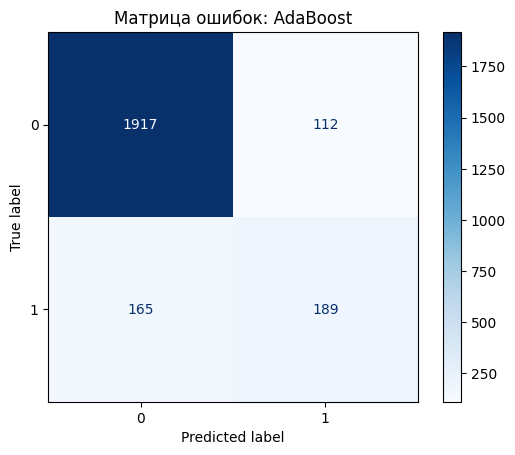


=== Classification Report ===
              precision    recall  f1-score   support

    Не купил       0.92      0.94      0.93      2029
       Купил       0.63      0.53      0.58       354

    accuracy                           0.88      2383
   macro avg       0.77      0.74      0.75      2383
weighted avg       0.88      0.88      0.88      2383



In [13]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier

# Определяем модели с параметрами, включая class_weight для борьбы с дисбалансом
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=50,
        class_weight='balanced',
        random_state=52
    ),
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=50,
        class_weight='balanced',
        random_state=52
    ),
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        random_state=52
    )
}

# Обучаем и оцениваем каждую
results = {}

for name, model in models.items():
    print(f"\n=== Обучение: {name} ===")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = {'accuracy': acc, 'f1_score': f1}
    
    print(f"• Accuracy: {acc:.4f}")
    print(f"• F1-score (class 'Купил'): {f1:.4f}")
    
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f"Матрица ошибок: {name}")
    plt.show()
    
    # Подробный отчёт
    print("\n=== Classification Report ===")
    report = classification_report(y_test, y_pred, target_names=['Не купил', 'Купил'])
    print(report)
    
    # Сравнение с kNN (если kNN уже обучен)
    if 'kNN' in locals():  # Проверяем, что kNN существует
        knn_f1 = f1_score(y_test, y_test_pred_final)  # Замени на твой final_y_pred_knn
        diff_f1 = f1 - knn_f1
        sign = "↑" if diff_f1 > 0 else "↓"
        print(f"\n=== Сравнение с kNN ===")
        print(f"• F1-score {name}: {f1:.4f} ({sign} {abs(diff_f1):.4f} от kNN)")
        if diff_f1 > 0:
            print("  -> Модель лучше kNN по F1-score (класс 'Купил').")
        else:
            print("  -> Модель хуже kNN по F1-score (класс 'Купил').")

In [14]:
# === Подбор гиперпараметров для Random Forest, Extra Trees и AdaBoost ===

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Определяем метрику для подбора — F1-score для класса 1 (Купил)
f1_scorer = make_scorer(f1_score, pos_label=1)

# Список моделей и сеток параметров
models_grid = [
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(random_state=52),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced']
        }
    },
    {
        'name': 'Extra Trees',
        'model': ExtraTreesClassifier(random_state=52),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced']
        }
    },
    {
        'name': 'AdaBoost',
        'model': AdaBoostClassifier(random_state=52),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.5, 0.8, 1.0]
        }
    }
]

# Для каждой модели запускаем GridSearch
results_grid = {}

for model_info in models_grid:
    name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    print(f"\n=== Подбор параметров: {name} ===")
    
    # Создаём GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=f1_scorer,          # ← Ключевой параметр: оптимизация по F1-score класса 1
        cv=3,                      # 3-х фолдовая кросс-валидация
        n_jobs=-1,                 # используем все ядра
        verbose=1                  # вывод прогресса
    )
    
    # Обучаем
    grid_search.fit(X_train, y_train)
    
    # Сохраняем лучшие параметры и результат
    best_params = grid_search.best_params_
    best_f1 = grid_search.best_score_
    
    results_grid[name] = {
        'best_params': best_params,
        'best_f1': best_f1,
        'best_estimator': grid_search.best_estimator_
    }
    
    print(f"• Лучшие параметры: {best_params}")
    print(f"• Лучший F1-score на кросс-валидации: {best_f1:.4f}")



=== Подбор параметров: Random Forest ===
Fitting 3 folds for each of 18 candidates, totalling 54 fits
• Лучшие параметры: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
• Лучший F1-score на кросс-валидации: 0.6791

=== Подбор параметров: Extra Trees ===
Fitting 3 folds for each of 18 candidates, totalling 54 fits
• Лучшие параметры: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
• Лучший F1-score на кросс-валидации: 0.6577

=== Подбор параметров: AdaBoost ===
Fitting 3 folds for each of 9 candidates, totalling 27 fits
• Лучшие параметры: {'learning_rate': 0.5, 'n_estimators': 50}
• Лучший F1-score на кросс-валидации: 0.6329



=== Финальная оценка лучших моделей на тесте ===

=== Модель: Random Forest ===
• Accuracy: 0.8943
• F1-score (класс 'Купил'): 0.6640

=== Classification Report ===
              precision    recall  f1-score   support

    Не купил       0.95      0.93      0.94      2029
       Купил       0.63      0.70      0.66       354

    accuracy                           0.89      2383
   macro avg       0.79      0.82      0.80      2383
weighted avg       0.90      0.89      0.90      2383



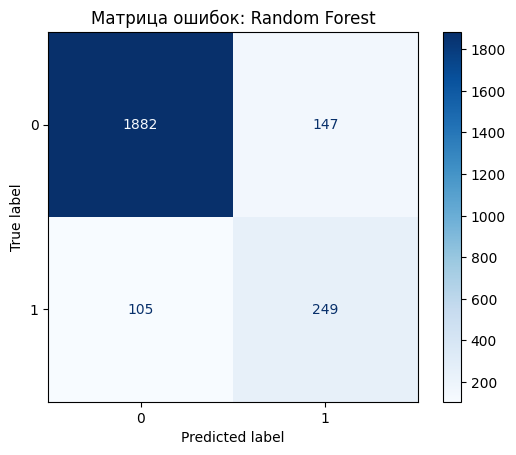


=== Модель: Extra Trees ===
• Accuracy: 0.8833
• F1-score (класс 'Купил'): 0.6481

=== Classification Report ===
              precision    recall  f1-score   support

    Не купил       0.95      0.91      0.93      2029
       Купил       0.59      0.72      0.65       354

    accuracy                           0.88      2383
   macro avg       0.77      0.82      0.79      2383
weighted avg       0.90      0.88      0.89      2383



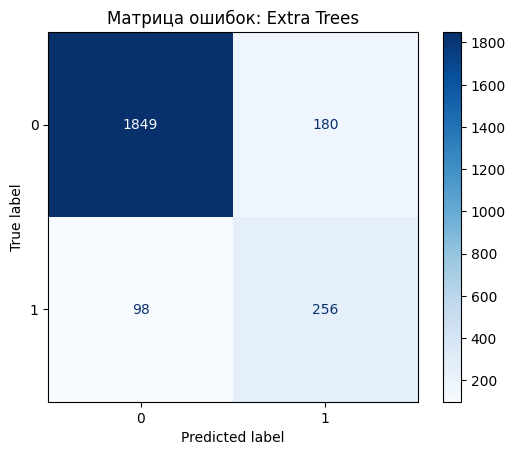


=== Модель: AdaBoost ===
• Accuracy: 0.8959
• F1-score (класс 'Купил'): 0.6208

=== Classification Report ===
              precision    recall  f1-score   support

    Не купил       0.93      0.95      0.94      2029
       Купил       0.68      0.57      0.62       354

    accuracy                           0.90      2383
   macro avg       0.80      0.76      0.78      2383
weighted avg       0.89      0.90      0.89      2383



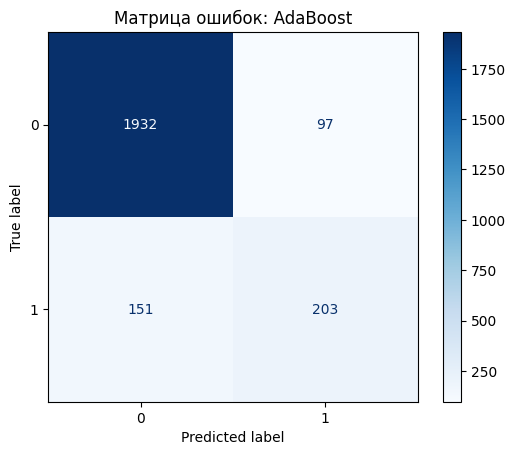

In [15]:
# === Оценка лучших моделей на тестовой выборке ===

print("\n=== Финальная оценка лучших моделей на тесте ===")

for name, result in results_grid.items():
    best_model = result['best_estimator']
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Не купил', 'Купил'])
    
    print(f"\n=== Модель: {name} ===")
    print(f"• Accuracy: {acc:.4f}")
    print(f"• F1-score (класс 'Купил'): {f1:.4f}")
    print("\n=== Classification Report ===")
    print(report)
    
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(f"Матрица ошибок: {name}")
    plt.show()

In [16]:
# === Автоматическое финальное сравнение ВСЕХ моделей ===

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import pandas as pd

# Собираем все модели в один словарь
final_models = {
    'kNN': knn_final,
    'Random Forest': results_grid['Random Forest']['best_estimator'],
    'Extra Trees': results_grid['Extra Trees']['best_estimator'],
    'AdaBoost': results_grid['AdaBoost']['best_estimator']
}

# Собираем метрики
comparison_data = []

for name, model in final_models.items():
    y_pred = model.predict(X_test)
    comparison_data.append({
        'Модель': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'F1-score (Купил)': round(f1_score(y_test, y_pred, pos_label=1), 4),
        'Recall (Купил)': round(recall_score(y_test, y_pred, pos_label=1), 4),
        'Precision (Купил)': round(precision_score(y_test, y_pred, pos_label=1), 4)
    })

# Создаём и выводим таблицу
df_final = pd.DataFrame(comparison_data)
print("=== ФИНАЛЬНОЕ СРАВНЕНИЕ МОДЕЛЕЙ ===")
print(df_final.to_string(index=False))

# Лучшая модель по F1-score
best_model_row = df_final.loc[df_final['F1-score (Купил)'].idxmax()]
print(f"\nЛучшая модель по F1-score: {best_model_row['Модель']} ({best_model_row['F1-score (Купил)']:.4f})")

=== ФИНАЛЬНОЕ СРАВНЕНИЕ МОДЕЛЕЙ ===
       Модель  Accuracy  F1-score (Купил)  Recall (Купил)  Precision (Купил)
          kNN    0.8779            0.5009          0.4124             0.6376
Random Forest    0.8943            0.6640          0.7034             0.6288
  Extra Trees    0.8833            0.6481          0.7232             0.5872
     AdaBoost    0.8959            0.6208          0.5734             0.6767

Лучшая модель по F1-score: Random Forest (0.6640)


## 13. Общие выводы

- Задача — **бинарная классификация** (`Revenue = True/False`) на основе поведенческих данных пользователей.
- Данные содержат **умеренный дисбаланс классов** (85.15% / 14.85%), что требует использования `class_weight='balanced'`.
- Проведена **полная предобработка**: очистка от выбросов, исправление логических несогласованностей, one-hot кодирование, стандартизация.
- Удалены **коррелирующие признаки**, что улучшило стабильность и интерпретируемость моделей.
- **kNN** показала базовое качество (F1 = 0.5009), но уступает ансамблевым методам из-за чувствительности к дисбалансу.
- Среди протестированных моделей **Random Forest с подобранными гиперпараметрами** показала **наилучший результат**:
  - **F1-score = 0.6640**
  - **Recall = 0.7034** (70% реальных покупателей выявлено)
  - Устойчива к выбросам, не требует нормализации (хотя она была сделана), поддерживает `class_weight`.
- **Рекомендация**: использовать **Random Forest** с параметрами:
  ```python
  {
      'class_weight': 'balanced',
      'max_depth': None,
      'min_samples_split': 10,
      'n_estimators': 50
  }